<a id='section0'></a>
# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

* *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
* *balcony* — число балконов
* *ceiling_height* — высота потолков (м)
* *cityCenters_nearest* — расстояние до центра города (м)
* *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
* *first_day_exposition* — дата публикации
* *floor* — этаж
* *floors_total* — всего этажей в доме
* *is_apartment* — апартаменты (булев тип)
* *kitchen_area* — площадь кухни в квадратных метрах (м²)
* *last_price* — цена на момент снятия с публикации
* *living_area* — жилая площадь в квадратных метрах(м²)
* *locality_name* — название населённого пункта
* *open_plan* — свободная планировка (булев тип)
* *parks_around3000* — число парков в радиусе 3 км
* *parks_nearest* — расстояние до ближайшего парка (м)
* *ponds_around3000* — число водоёмов в радиусе 3 км
* *ponds_nearest* — расстояние до ближайшего водоёма (м)
* *rooms* — число комнат
* *studio* — квартира-студия (булев тип)
* *total_area* — площадь квартиры в квадратных метрах (м²)
* *total_images* — число фотографий квартиры в объявлении

* [Шаг 0. Исследование объявлений о продаже квартир](#section0)  
* [Шаг 1. Откройте файл с данными и изучите общую информацию](#section1) 
    * [Вывод](#section1.1) 
* [Шаг 2. Предобработка данных](#section2)  
    * [Обработка пропусков в столбце is_apartment](#section2.1) 
    * [Обработка пропусков в столбце 'balcony'](#section2.2)
    * [Работа со столбцом 'first_day_exposition'](#section2.3)
    * [Обработка пропусков в столбце floors_total](#section2.4)
    * [Обработка пропусков в столбцах  living_area и kitchen_area](#section2.5)
    * [Обработка пропусков в столбцах days_exposition](#section2.6)
    * [Обработка пропусков в столбце ceiling_height](#section2.7)
* [Шаг 3. Посчитайте и добавьте в таблицу](#section3)  
    * [Цена за квадратный метр](#section3.1)
    * [День недели, месяц и год публикации объявления](#section3.2)
    * [Этаж квартиры](#section3.3)
    * [Соотношение жилой и общей площади](#section3.4)
    * [Отношение площади кухни к общей](#section3.5)
* [Шаг 4. Проведите исследовательский анализ данных и выполните инструкции](#section4) 
    * [Изучение площади](#section4.1)
    * [Изучение цены](#section4.2)  
    * [Изучение числа комнат](#section4.3)  
    * [Изучение высоты потолков](#section4.4)
* [Шаг 5. Задачи](#section5) 
    * [Какие факторы больше всего влияют на стоимость квартиры?](#section4.5)
    * [10 населённых пунктов с наибольшим числом объявлений](#section4.6)
* [Шаг 5. Общий вывод](#section5)  


<a id='section1'></a>
## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#Для удобства разместим столбцы в другом порядке

data = data[[
    'locality_name',
    'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'is_apartment',
 'studio',
 'open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'cityCenters_nearest',
 'airports_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest'
]]

In [ ]:
data.head(10)

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.0,NaN,False,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.40,18.60,11.00,NaN,1,2.0,1,11.0,NaN,False,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.00,34.30,8.30,NaN,2,0.0,4,5.0,NaN,False,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.00,NaN,NaN,NaN,3,0.0,9,14.0,NaN,False,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.0,NaN,False,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0
5,городской посёлок Янино-1,30.40,14.40,9.10,NaN,1,NaN,5,12.0,NaN,False,False,10,2890000.0,2018-09-10T00:00:00,55.0,NaN,NaN,NaN,NaN,NaN,NaN
6,посёлок Парголово,37.30,10.60,14.40,NaN,1,1.0,6,26.0,NaN,False,False,6,3700000.0,2017-11-02T00:00:00,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN
7,Санкт-Петербург,71.60,NaN,18.90,NaN,2,2.0,22,24.0,NaN,False,False,5,7915000.0,2019-04-18T00:00:00,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN
8,посёлок Мурино,33.16,15.43,8.81,NaN,1,NaN,26,27.0,NaN,False,False,20,2900000.0,2018-05-23T00:00:00,189.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,61.00,43.60,6.50,2.50,3,2.0,7,9.0,NaN,False,False,18,5400000.0,2017-02-26T00:00:00,289.0,15008.0,50898.0,0.0,NaN,0.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23650 non-null object
total_area              23699 non-null float64
living_area             21796 non-null float64
kitchen_area            21421 non-null float64
ceiling_height          14504 non-null float64
rooms                   23699 non-null int64
balcony                 12180 non-null float64
floor                   23699 non-null int64
floors_total            23613 non-null float64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
total_images            23699 non-null int64
last_price              23699 non-null float64
first_day_exposition    23699 non-null object
days_exposition         20518 non-null float64
cityCenters_nearest     18180 non-null float64
airports_nearest        18157 non-null float64
parks_around3000        18181 non-null float64
parks_nearest 

In [ ]:
data.describe()

,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,total_images,last_price,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,23699.000000,21796.000000,21421.000000,14504.000000,23699.000000,12180.000000,23699.000000,23613.000000,23699.000000,2.369900e+04,20518.000000,18180.000000,18157.000000,18181.000000,8079.000000,18181.000000,9110.000000
mean,60.348651,34.457852,10.569807,2.771499,2.070636,1.150082,5.892358,10.673824,9.858475,6.541549e+06,180.888634,14191.277833,28793.672193,0.611408,490.804555,0.770255,517.980900
std,35.654083,22.030445,5.905438,1.261056,1.078405,1.071300,4.885249,6.597173,5.682529,1.088701e+07,219.727988,8608.386210,12630.880622,0.802074,342.317995,0.938346,277.720643
min,12.000000,2.000000,1.300000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.219000e+04,1.000000,181.000000,0.000000,0.000000,1.000000,0.000000,13.000000
25%,40.000000,18.600000,7.000000,2.520000,1.000000,0.000000,2.000000,5.000000,6.000000,3.400000e+06,45.000000,9238.000000,18585.000000,0.000000,288.000000,0.000000,294.000000
50%,52.000000,30.000000,9.100000,2.650000,2.000000,1.000000,4.000000,9.000000,9.000000,4.650000e+06,95.000000,13098.500000,26726.000000,0.000000,455.000000,1.000000,502.000000
75%,69.900000,42.300000,12.000000,2.800000,3.000000,2.000000,8.000000,16.000000,14.000000,6.800000e+06,232.000000,16293.000000,37273.000000,1.000000,612.000000,1.000000,729.000000
max,900.000000,409.700000,112.000000,100.000000,19.000000,5.000000,33.000000,60.000000,50.000000,7.630000e+08,1580.000000,65968.000000,84869.000000,3.000000,3190.000000,3.000000,1344.000000


<a id='section1.1'></a>
### Вывод

* При выводе датафрейма данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Для того чтобы их "расклеить" параметру sep задали разделитель '\t'
* Столбец 'is_apartment' имеет неверный тип данных, должен быть bool, из-за этого большое количество пропусков
* Столбец 'first_day_exposition' имеет неверный тип данных, должен быть datetime
* Пропуски имеются в столбцах: *'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'*  
* Есть неправдаподобные значения в данных о площади и высоте потолков. 
* В столбце floors_total аномально высокое значение: 60 этажей


Пропуски в столбцах 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area' могут быть связаны с тем, что пользователь не знал эти данные о квартире.  

Пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'  могут быть связаны с отсутсвием в населенном пункте аэропорта, центра города, водоемов и парков.  

Пропуски в столбцах 'days_exposition' могут быть связаны с тем, что квартира до сих пор не продана и объявление все еще размещено.  

Пропуски в столбце 'balcony' могут быть связаны с отсутвием балкона в квартире.  

Пропуски в столбце 'is_apartment' могут быть связаны с тем, что эти квартиры не являются апартаментами.

<a id='section2'></a>
### Шаг 2. Предобработка данных

<a id='section2.1'></a>
### Обработка пропусков в столбце is_apartment

In [ ]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Скроее всего пропуски в столбце is_apartment указывают на то, что эти квартиры не являются апартаментами, поэтому заполним их 0,  а потом переведем в булевы тип.

In [ ]:
#Заменим пропуски в столбце 'is_apartment' на 0

data['is_apartment'] = data['is_apartment'].fillna(0)

In [ ]:
#Изменим тип данных в столбце 'is_apartment' на bool

data['is_apartment'] = data['is_apartment'].astype('bool')

In [ ]:
#Проверим тип данных столбца 'is_apartment'

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23650 non-null object
total_area              23699 non-null float64
living_area             21796 non-null float64
kitchen_area            21421 non-null float64
ceiling_height          14504 non-null float64
rooms                   23699 non-null int64
balcony                 12180 non-null float64
floor                   23699 non-null int64
floors_total            23613 non-null float64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
total_images            23699 non-null int64
last_price              23699 non-null float64
first_day_exposition    23699 non-null object
days_exposition         20518 non-null float64
cityCenters_nearest     18180 non-null float64
airports_nearest        18157 non-null float64
parks_around3000        18181 non-null float64
parks_nearest  

In [ ]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

<a id='section2.2'></a>
### Обработка пропусков в столбце balcony

Пропуски в столбце balcony скороее всего связаны с отсутвием балкона в квартире, поэтому заполним их 0.

In [ ]:
#Заменим пропуски в столбце 'balcony' на 0, а тип данных на int

data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [ ]:
data.head(10)

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.40,18.60,11.00,NaN,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.00,34.30,8.30,NaN,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.00,NaN,NaN,NaN,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0
5,городской посёлок Янино-1,30.40,14.40,9.10,NaN,1,0,5,12.0,False,False,False,10,2890000.0,2018-09-10T00:00:00,55.0,NaN,NaN,NaN,NaN,NaN,NaN
6,посёлок Парголово,37.30,10.60,14.40,NaN,1,1,6,26.0,False,False,False,6,3700000.0,2017-11-02T00:00:00,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN
7,Санкт-Петербург,71.60,NaN,18.90,NaN,2,2,22,24.0,False,False,False,5,7915000.0,2019-04-18T00:00:00,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN
8,посёлок Мурино,33.16,15.43,8.81,NaN,1,0,26,27.0,False,False,False,20,2900000.0,2018-05-23T00:00:00,189.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,61.00,43.60,6.50,2.50,3,2,7,9.0,False,False,False,18,5400000.0,2017-02-26T00:00:00,289.0,15008.0,50898.0,0.0,NaN,0.0,NaN


<a id='section2.3'></a>

In [ ]:
#Заменим тип данных столбца 'first_day_exposition' на datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [ ]:
#Проверим тип данных

data.dtypes

locality_name                   object
total_area                     float64
living_area                    float64
kitchen_area                   float64
ceiling_height                 float64
rooms                            int64
balcony                          int64
floor                            int64
floors_total                   float64
is_apartment                      bool
studio                            bool
open_plan                         bool
total_images                     int64
last_price                     float64
first_day_exposition    datetime64[ns]
days_exposition                float64
cityCenters_nearest            float64
airports_nearest               float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
dtype: object

<a id='section2.4'></a>
### Обработка пропусков в столбце floors_total

In [ ]:
#Посмотрим сколько процентов данных пропущено в столбце floors_total

len(data[data['floors_total'].isna()])/len(data['floors_total'])

0.0036288450989493226

Для заполнения пропусков в столбце floors_total недостаточно данных, но процент пропусков очень мал, так что можно удалить эти строки.

In [ ]:
data.dropna(subset = ['floors_total'], inplace = True)

<a id='section2.5'></a>
### Обработка пропусков в столбцах  living_area и kitchen_area

In [ ]:
data['living_area'].isna().sum()

1870

In [ ]:
data['kitchen_area'].isna().sum()

2231

Пропуски в столбцах living_area и kitchen_area заполним медианными значениями в зависимости от количсетва комнат.

In [ ]:
living_area_median = {}
kitchen_area_median = {}
for i in data['rooms'].unique():
    living_area_median[i] = data[data['rooms'] == i]['living_area'].median()
    kitchen_area_median[i] = data[data['rooms'] == i]['kitchen_area'].median()
    
def fill_living_area(row):
    if pd.isnull(row['living_area']):
        return living_area_median[row['rooms']]
    else:
        return row['living_area']
    
def fill_kitchen_area(row):
    if pd.isnull(row['kitchen_area']) and row['studio']:
        return 0.0
    elif pd.isnull(row['kitchen_area']) and row['rooms'] == 0:
        return 0.0
    elif pd.isnull(row['kitchen_area']) and not(row['studio']):
        return kitchen_area_median[row['rooms']]
    else:
        return row['kitchen_area']
    
data['living_area'] = data.apply(fill_living_area, axis = 1)
data['kitchen_area'] = data.apply(fill_kitchen_area, axis = 1)
    

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
data['living_area'].isna().sum()

0

In [ ]:
data['kitchen_area'].isna().sum()

0

<a id='section2.6'></a>
### Обработка пропусков в столбцах days_exposition

In [ ]:
#Посмотрим сколько пропусков в столбце days_exposition

data['days_exposition'].isna().sum()

3172

Я предпологаю, что пропуски в этом столбце из-за того, что квартира все еще не продана. Заполним их условным значение -1 и будем держать в уме, что он означает, то что квартира все еще продается.  
Перед этим проверим нет ли там уже -1.

In [ ]:
len(data.query('days_exposition == -1'))

0

-1 нет, можно заполнять.

In [ ]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

<a id='section2.7'></a>
### Обработка пропусков в столбце ceiling_height

In [ ]:
data['ceiling_height'].isna().sum()

9118

Заполним пропуски в столбце ceiling_height медианным значением в зависимости от количсетва комнат.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [ ]:
data['ceiling_height'].isna().sum()

0

In [ ]:
data.corr()['ceiling_height'].sort_values(ascending=False)

ceiling_height              1.000000
is_apartment                0.146543
price_meter                 0.099911
total_area                  0.080777
living_area                 0.079184
kitchen_area                0.065529
last_price                  0.064447
ponds_around3000            0.063652
parks_around3000            0.056807
rooms                       0.048052
balcony                     0.032687
open_plan                   0.017670
days_exposition             0.009375
ratio_living_total_area     0.006651
total_images                0.004411
ratio_kitchen_total_area    0.001382
studio                      0.000377
year_exposition            -0.000370
month_exposition           -0.002699
weekday_exposition         -0.009887
floor                      -0.012699
airports_nearest           -0.018843
parks_nearest              -0.018947
floors_total               -0.026843
ponds_nearest              -0.047173
cityCenters_nearest        -0.075529
Name: ceiling_height, dtype: float64

<hr style="border: 2px solid green;" />

<a id='section2.8'></a>
### Обработка пропусков в столбцах cityCenters_nearest

Недостаточно данных для заполнения пропусков, а условный маркер может исказить последущие исследования, так что оотсавим пропуски.

<a id='section3'></a>
### Шаг 3. Посчитайте и добавьте в таблицу

<a id='section3.1'></a>
#### Цена за квадратный метр

In [ ]:
#Посчитаем цену за квадратный метр

data['price_meter'] = data['last_price']/data['total_area']

In [ ]:
#Округлим цену

data['price_meter'] = data['price_meter'].round()

In [ ]:
data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_meter
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,-1.0,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.0
1,посёлок Шушары,40.4,18.6,11.0,2.65,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82921.0
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92786.0
3,Санкт-Петербург,159.0,45.0,9.5,2.65,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.0


<a id='section3.2'></a>
#### День недели, месяц и год публикации объявления

In [ ]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [ ]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [ ]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [ ]:
data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_meter,weekday_exposition,month_exposition,year_exposition
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,-1.0,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.0,3,3,2019
1,посёлок Шушары,40.4,18.6,11.0,2.65,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82921.0,1,12,2018
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92786.0,3,8,2015
3,Санкт-Петербург,159.0,45.0,9.5,2.65,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.0,4,7,2015
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.0,1,6,2018


<a id='section3.3'></a>
#### Этаж квартиры

In [ ]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_group'] = data.apply(floor_group, axis=1)

In [ ]:
data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_meter,weekday_exposition,month_exposition,year_exposition,floor_group
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,-1.0,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.0,3,3,2019,другой
1,посёлок Шушары,40.4,18.6,11.0,2.65,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82921.0,1,12,2018,первый
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92786.0,3,8,2015,другой
3,Санкт-Петербург,159.0,45.0,9.5,2.65,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.0,4,7,2015,другой
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.0,1,6,2018,другой


<a id='section3.4'></a>
#### Соотношение жилой и общей площади

In [ ]:
data['ratio_living_total_area'] = data['living_area']/data['total_area']
data['ratio_living_total_area'] = data['ratio_living_total_area'].round(2)

<a id='section3.5'></a>
#### Соотношение куханной к общей площади

In [ ]:
data['ratio_kitchen_total_area'] = data['kitchen_area']/data['total_area']
data['ratio_kitchen_total_area'] = data['ratio_kitchen_total_area'].round(2)

In [ ]:
data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_meter,weekday_exposition,month_exposition,year_exposition,floor_group,ratio_living_total_area,ratio_kitchen_total_area
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,-1.0,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.0,3,3,2019,другой,0.47,0.23
1,посёлок Шушары,40.4,18.6,11.0,2.65,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82921.0,1,12,2018,первый,0.46,0.27
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92786.0,3,8,2015,другой,0.61,0.15
3,Санкт-Петербург,159.0,45.0,9.5,2.65,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.0,4,7,2015,другой,0.28,0.06
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.0,1,6,2018,другой,0.32,0.41


<a id='section4'></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id='section4.1'></a>
#### Изучение площади

In [ ]:
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

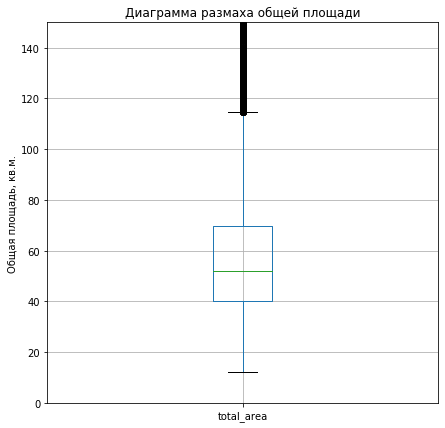

In [ ]:
data.boxplot('total_area', figsize=(7,7))
plt.ylim(0, 150)
plt.title('Диаграмма размаха общей площади')
plt.ylabel('Общая площадь, кв.м.')
plt.show()

Большое количество выбросов.

Посмотрим сколько процентов данных мы потеряем, если отбросим все выбросы > 120 кв.м.

In [ ]:
len(data.query('total_area > 120'))/ len(data['total_area'])

0.044805827298522

Всего 4%, значит может отбросить их.

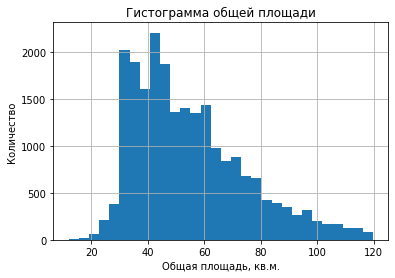

In [ ]:
data.query('total_area < 120').hist('total_area', bins=30)
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Количество')
plt.title('Гистограмма общей площади')
plt.show()

Большая часть значений общей площади лежит в диапазоне от 30 до 50 кв.м., что выглядит правдоподобно. 

<a id='section4.2'></a>
#### Изучение цены

In [ ]:
data['last_price'].describe()


count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

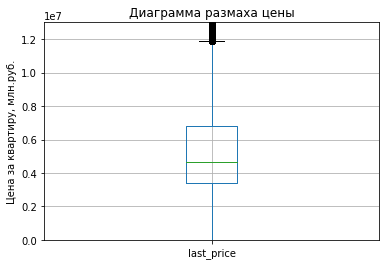

In [ ]:
data.boxplot('last_price')
plt.ylim(0, 13000000)
plt.title('Диаграмма размаха цены')
plt.ylabel('Цена за квартиру, млн.руб.')
plt.show()

Посмотрим сколько процентов данных мы потеряем, если отбросим все выбросы > 12000000

In [ ]:
len(data.query('last_price > 12000000'))/ len(data['last_price'])

0.08177698725278448

8%. Можем отбросить их.

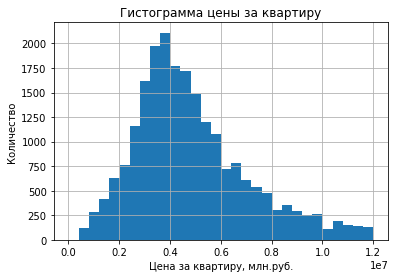

In [ ]:
data.query('last_price < 12000000').hist('last_price',bins=30)
plt.xlabel('Цена за квартиру, млн.руб.')
plt.ylabel('Количество')
plt.title('Гистограмма цены за квартиру')
plt.show()

Большая часть значений цены лежит в диапазоне от 2,5млн до 6млн., выглядит правдоподобно. 

In [ ]:
data.loc[data['last_price']  < 12000000]['last_price'].describe()

count    2.162500e+04
mean     4.859171e+06
std      2.246001e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.199900e+07
Name: last_price, dtype: float64

Средняя цена квартиры равна 4,7 млн.руб.

<a id='section4.3'></a>
#### Изучение числа комнат

In [ ]:
data['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

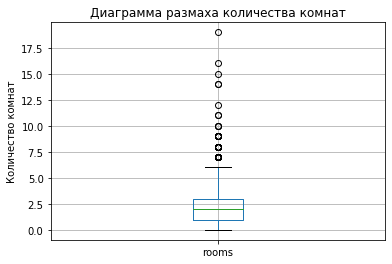

In [ ]:
data.boxplot('rooms')
plt.title('Диаграмма размаха количества комнат')
plt.ylabel('Количество комнат')
plt.show()

Отбросим выбросы и построим гистограму. 

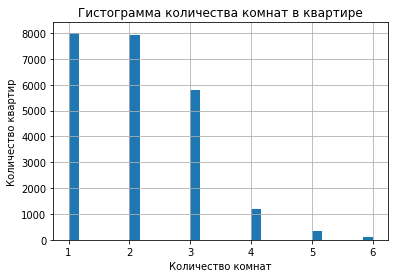

In [ ]:
data.query('rooms > 0 and rooms < 7 ').hist('rooms',bins=30)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Гистограмма количества комнат в квартире')
plt.show()

Больше всего 1,2,3-комнатных квартир.

<a id='section4.4'></a>
#### Изучение высоты потолков

In [ ]:
data['ceiling_height'].describe()


count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

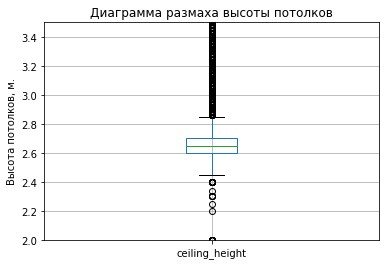

In [ ]:
data.boxplot('ceiling_height')
plt.ylim(2 , 3.5)
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('Высота потолков, м.')
plt.show()

Посмотрим сколько процентов данных мы потеряем, если отбросим все выбросы > 3.2 и < 2.2

In [ ]:
len(data.query('ceiling_height > 3.2 or ceiling_height < 2.2 '))/ len(data['ceiling_height'])

0.03519247871934951

3%. Можем отбросить их.

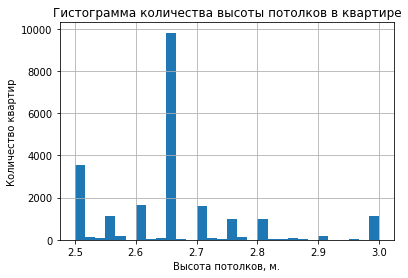

In [ ]:
data.query('ceiling_height > 2.2 and ceiling_height < 3.2').hist('ceiling_height',bins=30, range=(2.5,3))
plt.xlabel('Высота потолков, м.')
plt.ylabel('Количество квартир')
plt.title('Гистограмма количества высоты потолков в квартире')
plt.show()

Большая часть значений высоты потолков = 2,5м.

### Вывод по блоку

* Средняя площадь квартиры равна **60 кв.м.**
* Средняя цена квартиры равна **4,8 млн.руб.**
* Наиболее популярны 1 и 2 комнатные квартиры
* Средняя высота потолков составляет **2,5 м**


<a id='section5'></a>
## Задачи

<a id='section5.1'></a>
**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

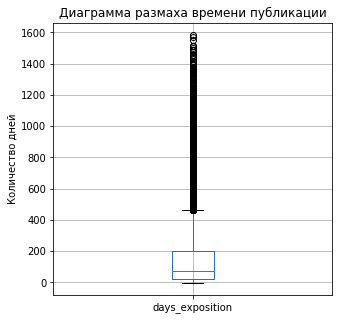

In [ ]:
data.boxplot(column = 'days_exposition', figsize = (5,5))
plt.title('Диаграмма размаха времени публикации')
plt.ylabel('Количество дней')
plt.show()

Посмотрим на график срока продажи квартир, отбросив выбросы.

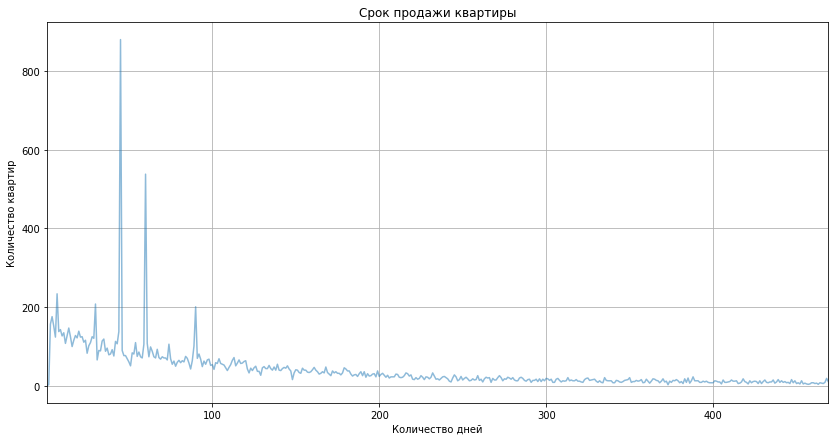

In [ ]:
(data.query('days_exposition < 470 and days_exposition > 0 ')
    .pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count')
    .plot(grid=True, figsize=(14, 7), legend=False, alpha=0.5, title='Срок продажи квартиры'))
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

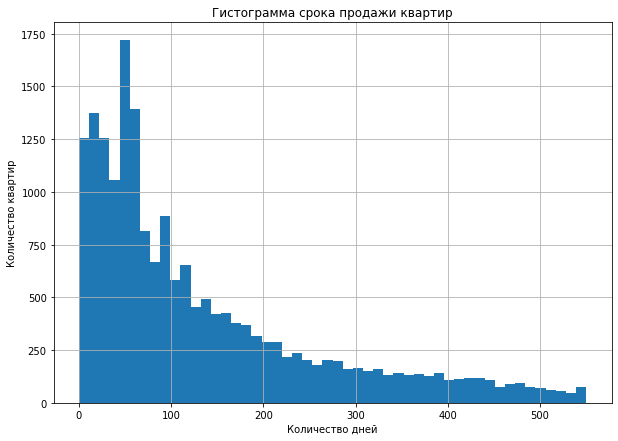

In [ ]:
data.query('days_exposition > 0').hist('days_exposition', bins=50, range=(0,550), figsize = (10,7))
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.title('Гистограмма срока продажи квартир')
plt.show()

In [ ]:
print('Медиана времени продажи квартиры:' , data.loc[data['days_exposition'] > 0]['days_exposition'].median())

Медиана времени продажи квартиры: 95.0


In [ ]:
print('Среденее значение времени продажи квартиры:' , data.loc[data['days_exposition'] > 0]['days_exposition'].mean())

Среденее значение времени продажи квартиры: 180.88483929357665


In [ ]:
data.loc[data['days_exposition'] > 0]['days_exposition'].quantile(0.25)

45.00000000000001

In [ ]:
data.loc[data['days_exposition'] > 0]['days_exposition'].quantile(0.75)

232.0

Медианное значение почти в два раза меньше среднего, что говорит о большом количестве выбросов. Значит будем ориентироваться на медиану.  
Получается что в среднем продажа квартиры занимает 95 дней. Продажи квартир занявшие меньше 45 дней можно считать слишком быстрыми, а больше 232 дней слишком долгими.

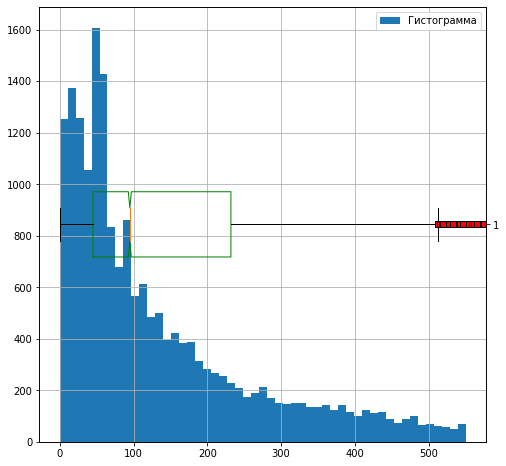

In [ ]:
histbox(data[data['days_exposition'] > 0]['days_exposition'], bins=51, boxprops=dict(color='green'),
        whiskerprops=dict(color='black'), range=(0, 550))

<hr style="border: 2px solid green;" />

<a id='section5.2'></a>
**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

После проведенного выше анализа создадим новый датафрейм без выбросов и посмотрим его процентное отношение к изначальному датафрейму, чтобы убедиться, что мы не потеряли слишком много данных.

In [ ]:
good_data = data[(data['living_area'] < 120) &
                 (data['ceiling_height'] > 2.2) & 
                 (data['ceiling_height'] < 3.2) & 
                 (data['rooms'] < 7) &
                 (data['last_price'] < 12000000)].reset_index(drop = True)

In [ ]:
len(good_data)/len(data)

0.8874772371151485

После удаления выбросов у нас осталось 89% процентов от изначального датафрейма. Окей.

<a id='section5.3'></a>
**Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

In [ ]:
good_data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_meter,weekday_exposition,month_exposition,year_exposition,floor_group,ratio_living_total_area,ratio_kitchen_total_area
0,посёлок Шушары,40.4,18.6,11.0,2.65,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82921.0,1,12,2018,первый,0.46,0.27
1,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92786.0,3,8,2015,другой,0.61,0.15
2,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.0,1,6,2018,другой,0.32,0.41
3,городской посёлок Янино-1,30.4,14.4,9.1,2.65,1,0,5,12.0,False,False,False,10,2890000.0,2018-09-10,55.0,NaN,NaN,NaN,NaN,NaN,NaN,95066.0,0,9,2018,другой,0.47,0.30
4,посёлок Парголово,37.3,10.6,14.4,2.65,1,1,6,26.0,False,False,False,6,3700000.0,2017-11-02,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN,99196.0,3,11,2017,другой,0.28,0.39


#### Изучим, как зависит  цена от площади, числа комнат, удалённости от центра

Построим матрицу рассеяния и изучим кореляцию данных, чтобы посомтреть на их зависимость.

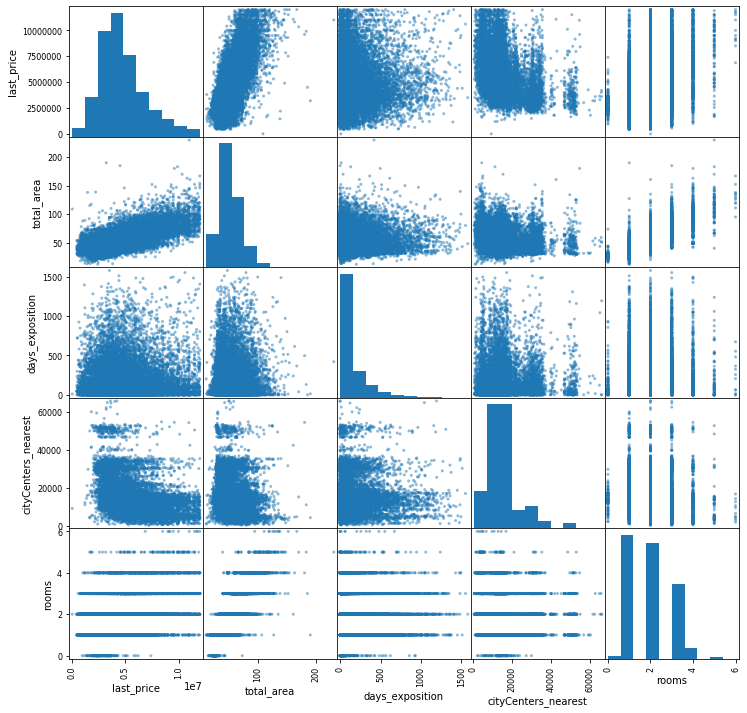

In [ ]:
pd.plotting.scatter_matrix(good_data[['last_price',
           'total_area',
           'days_exposition',
           'cityCenters_nearest',
           'rooms']], figsize=(12, 12))
plt.show()

In [ ]:
corr = good_data[['last_price',
           'total_area',
           'days_exposition',
           'cityCenters_nearest',
           'rooms']].corr()
corr.round(2)

,last_price,total_area,days_exposition,cityCenters_nearest,rooms
last_price,1.00,0.69,0.04,-0.32,0.44
total_area,0.69,1.00,0.08,-0.10,0.80
days_exposition,0.04,0.08,1.00,-0.02,0.05
cityCenters_nearest,-0.32,-0.10,-0.02,1.00,-0.06
rooms,0.44,0.80,0.05,-0.06,1.00


Судя по получившимся данным, больше всего на цену влияет общая площадь квартиры. А от площади зависит и количество комнат. Это логично:) Значит все правльно.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента: после того, как я оставила пропуски в столбце расстояние до центра нетронутыми, корреляция расстояния и цены уменьшилась. Следовательно, чем дальше квартира от центра, тем дешевле.</b> </div>

#### Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

Построим сводную таблицу где будет указан тип этажа и средняя стоймость квартиры на данном типе этажа.

In [ ]:
 good_data.pivot_table(index = 'floor_group', values = 'last_price', aggfunc= 'mean')

,last_price
floor_group,
другой,4.978714e+06
первый,4.069590e+06
последний,4.379100e+06


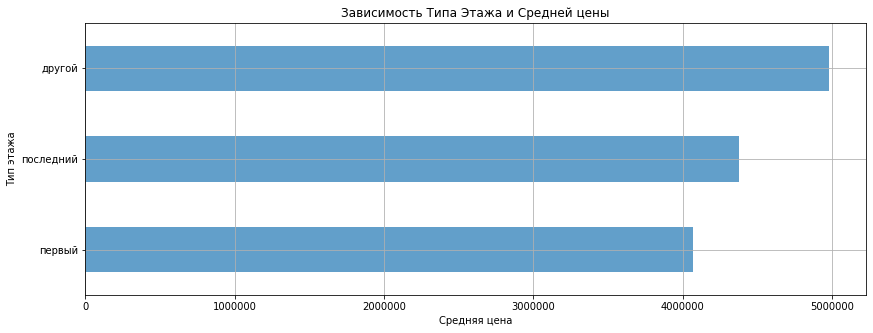

In [ ]:
(
    good_data
    .pivot_table(index = 'floor_group', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=True)
    .plot(y='last_price', kind='barh', title='Зависимость Типа Этажа и Средней цены', figsize=(14, 5), legend=False, alpha=0.7, grid=True, ylim=(3800000, 5000000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Тип этажа')
plt.show()

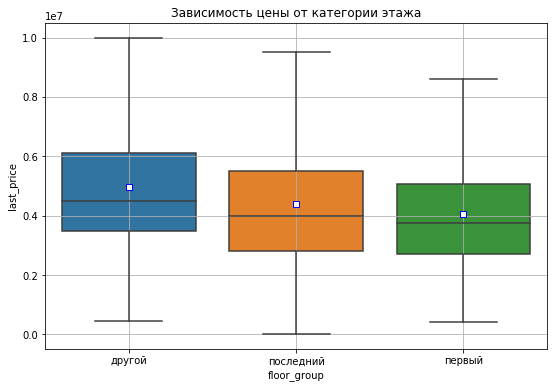

In [ ]:
make_box_by_category(value='last_price', category='floor_group', data=good_data, 
                    sort=False, sort_by='last_price', stat='median', title='Зависимость цены от категории этажа')

<hr style="border: 2px solid orange;" />

Стоймость квартир на первом этаже самая низкая (мало кто любит жить на первом). Стоймость квартир с типом этажа 'другой' самая высокая. Разница в средней стоимости между первым и 'другим' этажом составляет почти 1 млн. рублей, что довольно много. Проанализировав полученный график, можно сделать вывод о том, что цена квартиры напрямую зависит от типа этажа на котором она расположена.

#### Изучим зависимость от даты размещения: дня недели, месяца и года

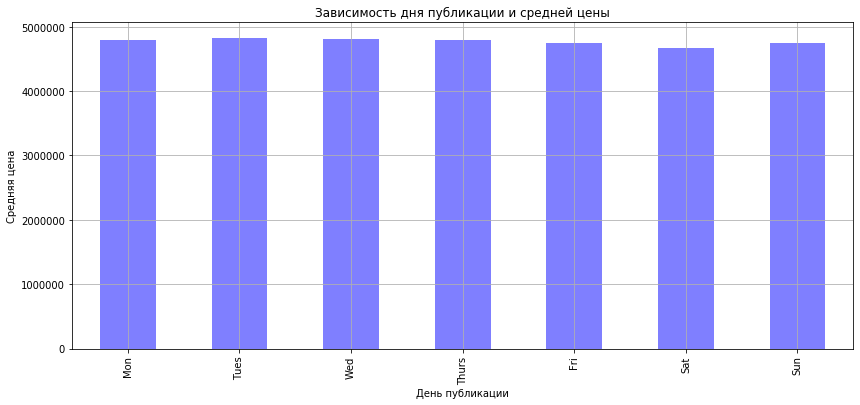

In [ ]:
# Рисуем график зависимости 'Дня публикации и Средней цены'
(
    good_data
    .pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc= 'mean')
    .plot(y='last_price', kind='bar', title='Зависимость дня публикации и средней цены', color='blue', figsize=(14, 6), legend=False, alpha=0.5, grid=True)
)
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlabel('День публикации')
plt.ylabel('Средняя цена')
plt.show()

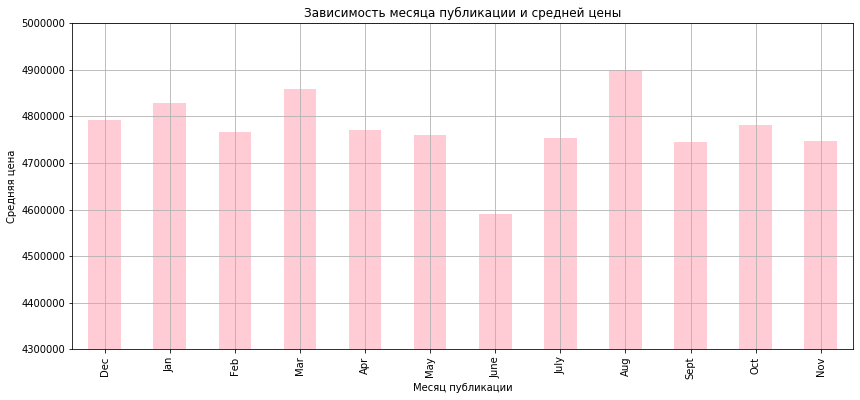

In [ ]:
# Рисем график зависимости 'Месяца публикации и Средней цены'
(
    good_data
    .pivot_table(index = 'month_exposition', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='month_exposition', ascending=False)
    .plot(y='last_price', kind='bar',  title='Зависимость месяца публикации и средней цены', color='pink', figsize=(14, 6), legend=False, alpha=0.8, grid=True, ylim=(4300000, 5000000))
)
plt.gca().set_xticklabels(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov'])
plt.xlabel('Месяц публикации')
plt.ylabel('Средняя цена')
plt.show()
 

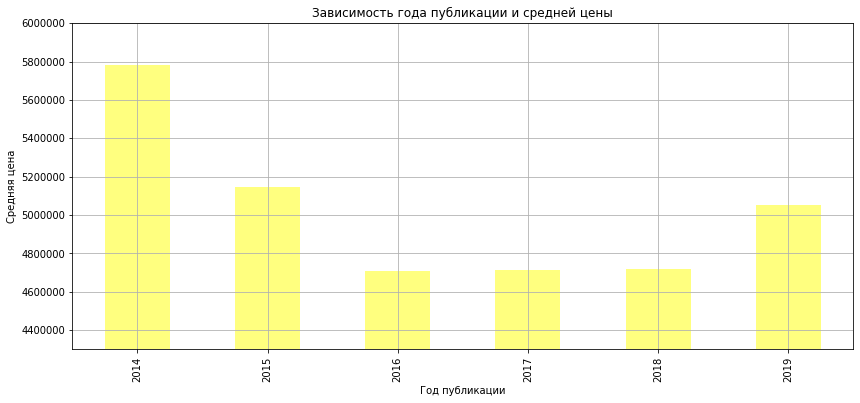

In [ ]:
   
# Рисуем график зависимости 'Года публикации и Средней цены'
(
    good_data
    .pivot_table(index = 'year_exposition', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='year_exposition', ascending=True)
    .plot(y='last_price', kind='bar', title='Зависимость года публикации и средней цены', color='yellow', figsize=(14, 6), legend=False, alpha=0.5, grid=True, ylim=(4300000, 6000000))
)
plt.xlabel('Год публикации')
plt.ylabel('Средняя цена')
plt.show()

Изучив графики зависимости средней стоймости квартиры от дня, месяца и года публикации, можно сдлеать вывод, что:
* Средняя цена квартиры не зависит от дня публикации
* Самая высокая средняя цена у квартир опубликованнх в Апреле, а самая низкая в Июне (пока не могу сказать с чем это связано)
* Самая высокая средняя цена за квартиру наблюдалась в 2014 году, она достигала почти 5,8млн.руб., скорее всего это связано с падением национальной валюты в этом году, что привело к низкому спросу на недвижмость и повышению цен на нее, при этом самая низкая цена была в 2016. 

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.**

In [ ]:
# Из очищенных данных cформируем топ 10 пунктов по количеству объявлений
top_10_locality_name = (good_data
                        .pivot_table(index='locality_name', values='last_price', aggfunc='count')
                        .sort_values(by='last_price', ascending=False).head(10))
top_10_locality_name

,last_price
locality_name,
Санкт-Петербург,13168
посёлок Мурино,518
посёлок Шушары,438
Всеволожск,393
Колпино,330
Пушкин,327
посёлок Парголово,326
Гатчина,301
деревня Кудрово,298


In [ ]:
# Посчитайте среднюю цену квадратного метра в этих населённых пунктах

(good_data.query('locality_name in @top_10_locality_name.index')
    .pivot_table(index='locality_name', values='price_meter', aggfunc='mean')
    .sort_values(by='price_meter', ascending=False).head(10).round())

,price_meter
locality_name,
Санкт-Петербург,105346.0
Пушкин,100298.0
деревня Кудрово,92410.0
посёлок Парголово,90332.0
посёлок Мурино,85646.0
посёлок Шушары,78529.0
Колпино,75270.0
Гатчина,68348.0
Всеволожск,67154.0


Самая высокая цена 105 тыс. руб. за квадратный метр в Санкт-Петербурге, что не удивительно. Самая низкая цена из топ 10 населенных пунктов в Выборге, там цена за квадртаный метр в среднем составляет  58 тыс.руб.

**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

In [ ]:
#Создам новый датафрейм, где сохраню все данные которые относятся к городу Санкт-Петербург
#и расстояние до центра не равно условному маркеру 6666z (пропущенным значениям)

spb_good_data = good_data.copy().query('cityCenters_nearest != 6666 and locality_name == "Санкт-Петербург"')

In [ ]:
#Cоздам новый столбец central_region в который занесу расстояние до центра в км и округлю его до целего числа

spb_good_data['central_region'] = (spb_good_data['cityCenters_nearest'] / 1000).round()

<hr style="border: 2px solid red;" />

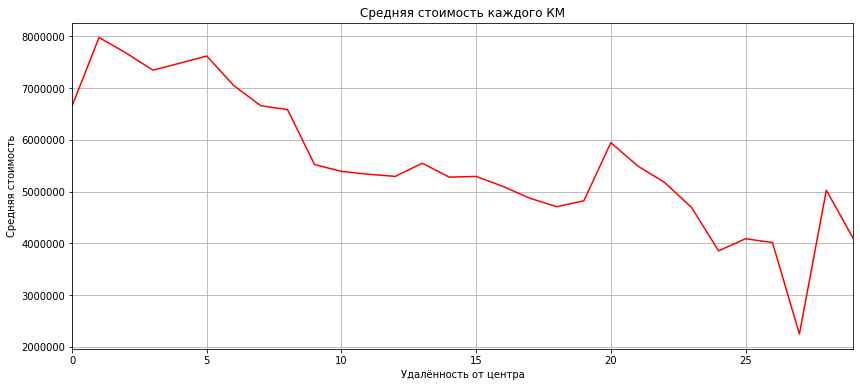

In [ ]:
#Создам новую переменную spb_good_data_price в которую занесу значения датафрейма spb_good_data,
#сгруппированные по столбцу central_region и рассчитаю среднее значение стоимости квартиры
#После чего использую метод .plot() для создания гистограммы, чтобы визуализировать полученные данные

spb_good_data_price = spb_good_data.groupby('central_region', as_index = False).agg({'last_price' : 'mean'})
spb_good_data_price.plot(x='central_region', y='last_price', legend=False, color='red', grid=True, figsize=(14, 6), title='Средняя стоимость каждого КМ')
plt.ylabel('Средняя стоимость')
plt.xlabel('Удалённость от центра')
plt.show()

Изучив график, можно сделать вывод, что в центральную зону входят все квартиры, расположенные в окружности с радиусом 8 км. Все что находится дальше этой границы уже не относится к центральной части города.

**Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

In [ ]:
#Создам новый датафрейм, где сохраню данные о квартирах из центрального района

spb_good_data_center = spb_good_data.query('central_region <= 8')

In [ ]:
spb_good_data_center['total_area'].describe()

count    2309.000000
mean       63.680723
std        23.179324
min        12.000000
25%        45.700000
50%        60.700000
75%        77.700000
max       190.000000
Name: total_area, dtype: float64

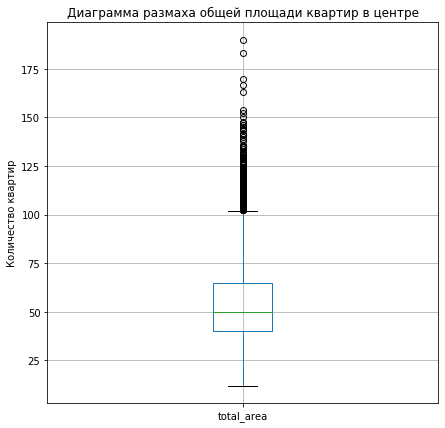

In [ ]:
spb_good_data.boxplot(column = 'total_area', figsize = (7,7))
plt.ylabel('Количество квартир')
plt.title('Диаграмма размаха общей площади квартир в центре')
plt.show()

Медианное значение площади квартиры в центре Санкт-Петербурга составляет 60кв.м., что на 8кв.м. отличается от медианного значения по остальным данным.

In [ ]:
spb_good_data_center['last_price'].describe()

count    2.309000e+03
mean     7.188472e+06
std      2.266480e+06
min      1.600000e+06
25%      5.500000e+06
50%      6.990000e+06
75%      8.900000e+06
max      1.199900e+07
Name: last_price, dtype: float64

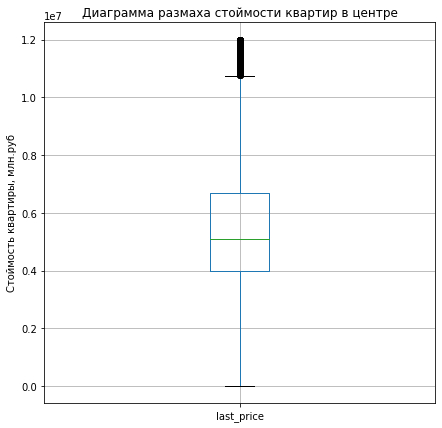

In [ ]:
spb_good_data.boxplot(column = 'last_price', figsize = (7,7))
plt.ylabel('Стоймость квартиры, млн.руб')
plt.title('Диаграмма размаха стоймости квартир в центре')
plt.show()

Медианное значение цены составляет 6,9 млн.руб., что так же очень сильно отличается от остальных данных. Там медианное значение цены стоставляло 4,6 млн.руб.

In [ ]:
spb_good_data_center['rooms'].describe()

count    2309.000000
mean        2.226938
std         0.998501
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

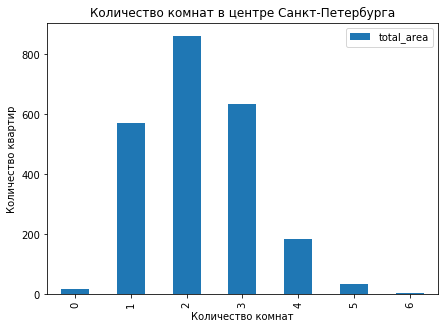

In [ ]:
spb_good_data_center.pivot_table(index='rooms', values='total_area', aggfunc='count').plot(y='total_area', kind='bar', figsize=(7, 5), title='Количество комнат в центре Санкт-Петербурга')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()

Наиболее популнярными в центре Санкт-Петербурга являются 2 и 3 комнатные квартиры, в то время как в остальных городах 1 и 2 комнатне квартиры.

In [ ]:
spb_good_data_center['ceiling_height'].describe()

count    2309.000000
mean        2.752889
std         0.176132
min         2.400000
25%         2.650000
50%         2.650000
75%         2.900000
max         3.180000
Name: ceiling_height, dtype: float64

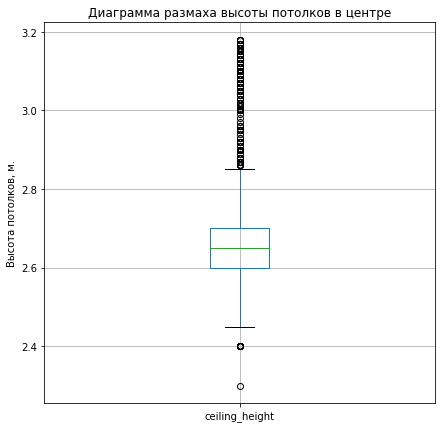

In [ ]:
spb_good_data.boxplot(column = 'ceiling_height', figsize = (7,7))
plt.ylabel('Высота потолков, м.')
plt.title('Диаграмма размаха высоты потолков в центре')
plt.show()

Медианное значение высоты потолков в центре Питера составляет 2.6 м. по остальным данным этот показатель был примерно таким же. Здесь нет особых отличий.

In [ ]:
corr_spb = spb_good_data[['last_price',
           'total_area',
           'rooms',
           'ceiling_height']].corr()
corr_spb.round(2)

,last_price,total_area,rooms,ceiling_height
last_price,1.00,0.79,0.51,0.36
total_area,0.79,1.00,0.79,0.25
rooms,0.51,0.79,1.00,0.04
ceiling_height,0.36,0.25,0.04,1.00


В центре Санкт-Петербурга зависимость цены от таких показателей как общая площадь, высота потолков и количество комнат намного сильней.

<a id='section6'></a>
### Шаг 5. Общий вывод

Проведя анализ объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет мне удалось выявить наиболее значимые параметры, которые влияют на формирование стоимости квартиры:

* Количество комнат - чем больше комнат, тем выше стоимость жилья
* Общая площадь квартиры - чем больше площадь, тем выше стоимость жилья
* Этаж квартиры - на первом этаже самые дешевые квартиры, наиболее дорогие квартиры распагаются выше первого и ниже последнего этажа

Так же удалось расчитать следующие показатели:

* Средняя площадь квартиры равна **60 кв.м.**
* Средняя цена квартиры равна **4,8 млн.руб.**
* Наиболее популярны 1 и 2 комнатные квартиры
* Средняя высота потолков составляет **2,5 м**
* В среднем продажа квартиры занимет **3 месяца**
* Продажи квартир занявшие меньше **45 дней** - слишком быстрые, а больше **232 дней** - слишком долгие
* В центральную зону входят все квартиры, расположенные в окружности с радиусом **8 км.**
* Самая высокая цена **105 тыс. руб.** за квадратный метр в Санкт-Петербурге, что не удивительно. Самая низкая цена из топ 10 населенных пунктов в Выборге, там цена за квадртаный метр в среднем составляет **58 тыс.руб.**
* Средняя цена квартиры **не зависит от дня публикации
* Самая высокая средняя цена у квартир опубликованнх в Апреле, а самая низкая в Июне (пока не могу сказать с чем это связано)
* Самая **высокая** средняя цена за квартиру наблюдалась в **2014 году**, она достигала почти 5,8млн.руб., скорее всего это связано с падением национальной валюты в этом году, что привело к низкому спросу на недвижмость и повышению цен на нее, при этом самая **низкая** цена была в **2016**. 